Source-Sink Pair Streamplots

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x, y)

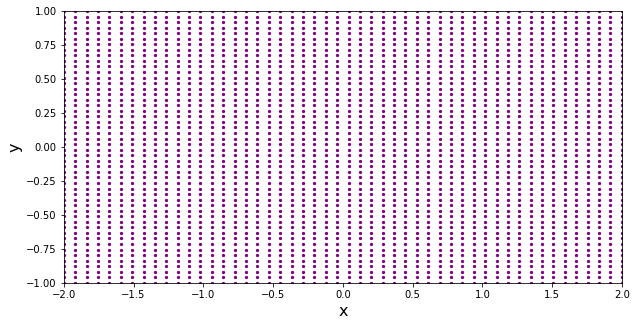

In [3]:
width = 10.0
height = (y_end-y_start)/(x_end-x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.scatter(X, Y, s=5, color='purple', marker='o');

In [4]:
# stream function of a source: psi = sigma/(2*pi) * theta + const. where sigma=source strength
# NOTE: we will use u = dpsi/dy and v = -dpsi/dx

# source strength 5 at (-1, 0)
sigma = 5.0
x_source, y_source = -1.0, 0.0
u_source = (sigma / (2 * math.pi) *
            (X - x_source) / ((X - x_source)**2 + (Y - y_source)**2))
v_source = (sigma / (2 * math.pi) *
            (Y - y_source) / ((X - x_source)**2 + (Y - y_source)**2))

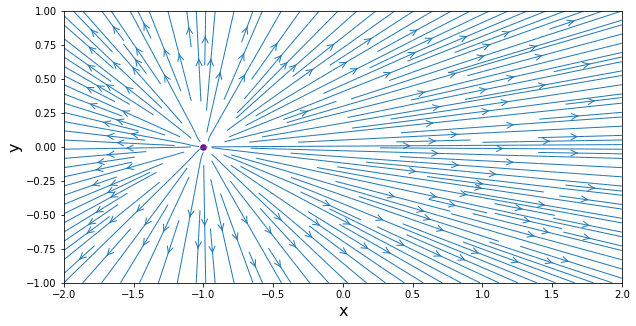

In [5]:
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_source, v_source,
                  density=2, linewidth=1, arrowsize=1.5, arrowstyle='->')
plt.scatter(x_source, y_source,
               color='purple', s=30, marker='o');

In [6]:
# sink strength -5 at (1, 0)
sigma = -10.0
x_sink, y_sink = 1.0, 0.0
u_sink = (sigma / (2 * math.pi) *
            (X - x_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))
v_sink = (sigma / (2 * math.pi) *
            (Y - y_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))

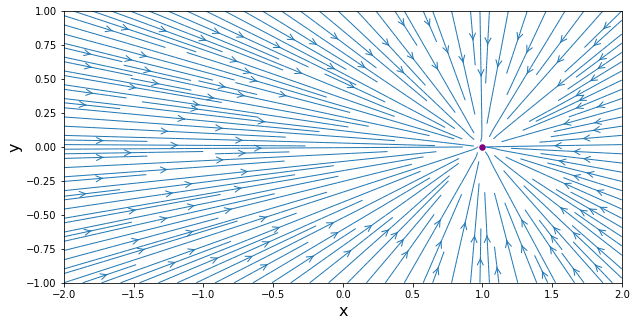

In [7]:
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_sink, v_sink,
                  density=2, linewidth=1, arrowsize=1.5, arrowstyle='->')
plt.scatter(x_sink, y_sink,
               color='purple', s=30, marker='o');

In [8]:
# source-sink pair, superimpose source and sink solutions
u_pair = u_source + u_sink
v_pair = v_source + v_sink

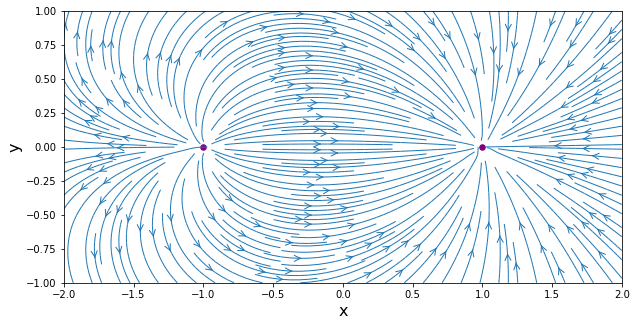

In [9]:
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_pair, v_pair,
                  density=2, linewidth=1, arrowsize=1.5, arrowstyle='->')
plt.scatter([x_source, x_sink], [y_source, y_sink], color='purple', s=30, marker='o');

Source-Sink in a Freestream

In [10]:
# freestream has psi = u_inf(ycos(a) - xsin(a)) where waves make angle a with x-axis, let a=0 so psi = u_inf * y

u_inf = 1.0  # freestream speed
u_free = u_inf * np.ones((N, N), dtype=float)
v_free = np.zeros((N, N), dtype=float)
psi_free = u_inf * Y